In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [36]:
# Let's Work On Covid19 Vaccine File.

Covid19_Vaccine = pd.read_csv('C19_Vaccine_Cleaned (1).csv')

Covid19_Vaccine.head()

<ipython-input-36-5d777c33a0ff>:3: DtypeWarning:

Columns (8,18,20,28,30,32,34,36,38,67,68,71,72,74,76,78) have mixed types. Specify dtype option on import or set low_memory=False.



,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,5/10/2023,36059,19.0,Nassau County,NY,97.5,"1,391,226",95.0,"1,384,503",95.0,...,"1,065,968","246,690","236,202",18.4,"231,748",19.8,"224,931",21.1,"109,947",44.6
1,5/10/2023,48281,19.0,Lampasas County,TX,98.9,"11,678",54.5,"11,660",57.4,...,"16,799","4,322","1,951",9.6,"1,947",10.5,"1,925",11.5,"1,229",28.4
2,5/10/2023,12013,19.0,Calhoun County,FL,98.6,"6,023",42.7,"6,016",44.8,...,"11,296","2,670",542,4.0,541,4.4,535,4.7,354,13.3
3,5/10/2023,48421,19.0,Sherman County,TX,98.9,"1,367",45.2,"1,364",48.2,...,"2,214",462,62,2.2,61,2.4,59,2.7,28,6.1
4,5/10/2023,6081,19.0,San Mateo County,CA,97.7,"748,919",95.0,"731,225",95.0,...,"611,410","126,877","286,931",39.6,"273,210",41.1,"257,086",42.0,"83,240",65.6


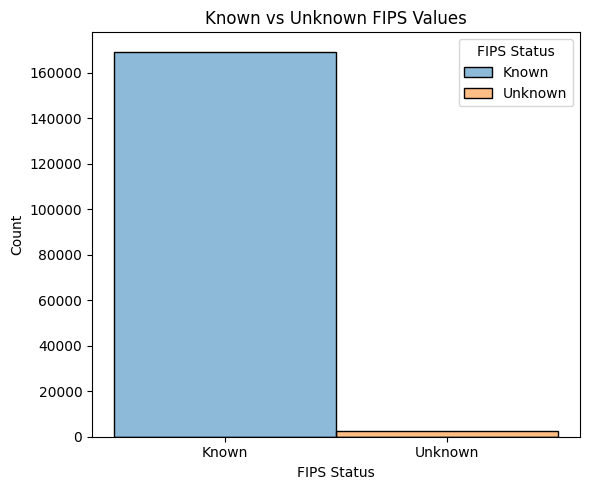

In [37]:
# Convert FIPS to string and classify as Known or Unknown
Covid19_Vaccine['FIPS'] = Covid19_Vaccine['FIPS'].astype(str)
Covid19_Vaccine['FIPS Status'] = Covid19_Vaccine['FIPS'].apply(lambda x: 'Unknown' if x in ['UNK', 'Unknown', ''] else 'Known')

# Plot histogram using seaborn histplot
plt.figure(figsize=(6, 5))
sns.histplot(data=Covid19_Vaccine, x='FIPS Status', stat='count', discrete=True,
             hue="FIPS Status")

plt.title("Known vs Unknown FIPS Values")
plt.xlabel("FIPS Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [38]:
import plotly.express as px

fig = px.histogram(Covid19_Vaccine, x='FIPS Status',color='FIPS Status')
fig.update_layout(
    title='Histogram of Known vs Unknown FIPS Status',
    width=800,   # adjust width in pixels
    height=500   # adjust height in pixels
)
fig.show()

I have remove all FIPS rows having value of 'UNK' or 'Unknown'from Covid19_vaccine Dataset.

In [39]:
#Now lets clear 'FIPS' Column

Column_FIPS_UNK = Covid19_Vaccine[Covid19_Vaccine['FIPS']=='UNK']

Column_FIPS_UNK.shape # for getting idea  of total rows having 'FIPS == UNK '.

# Column_FIPS_UNK.index: Retrieves the index (row labels) of the rows in Column_FIPS_UNK. These are the row indices where FIPS == 'UNK'
# Covid19_Vaccine.drop(...): Removes rows from Covid19_Vaccine based on the provided indices.

Covid19_Vaccine_Cleaned = Covid19_Vaccine.drop(Column_FIPS_UNK.index)

Covid19_Vaccine_Cleaned.shape # verifying the successfully removel of rows having 'FIPS=UNK' with Column_FIPS_UNK.

Covid19_Vaccine_Cleaned.to_csv('Covid19_Vaccine_Cleaned.csv',index=False)

In [40]:
Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['FIPS'] == 'UNK']

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct,FIPS Status


In [41]:
# show the colums of the dataset

display(Markdown('\n'.join(fr'{i + 1}. {c}'.replace('$', r'\$') for i, c in enumerate(Covid19_Vaccine_Cleaned.columns))))

1. Date
2. FIPS
3. MMWR_week
4. Recip_County
5. Recip_State
6. Completeness_pct
7. Administered_Dose1_Recip
8. Administered_Dose1_Pop_Pct
9. Administered_Dose1_Recip_5Plus
10. Administered_Dose1_Recip_5PlusPop_Pct
11. Administered_Dose1_Recip_12Plus
12. Administered_Dose1_Recip_12PlusPop_Pct
13. Administered_Dose1_Recip_18Plus
14. Administered_Dose1_Recip_18PlusPop_Pct
15. Administered_Dose1_Recip_65Plus
16. Administered_Dose1_Recip_65PlusPop_Pct
17. Series_Complete_Yes
18. Series_Complete_Pop_Pct
19. Series_Complete_5Plus
20. Series_Complete_5PlusPop_Pct
21. Series_Complete_5to17
22. Series_Complete_5to17Pop_Pct
23. Series_Complete_12Plus
24. Series_Complete_12PlusPop_Pct
25. Series_Complete_18Plus
26. Series_Complete_18PlusPop_Pct
27. Series_Complete_65Plus
28. Series_Complete_65PlusPop_Pct
29. Booster_Doses
30. Booster_Doses_Vax_Pct
31. Booster_Doses_5Plus
32. Booster_Doses_5Plus_Vax_Pct
33. Booster_Doses_12Plus
34. Booster_Doses_12Plus_Vax_Pct
35. Booster_Doses_18Plus
36. Booster_Doses_18Plus_Vax_Pct
37. Booster_Doses_50Plus
38. Booster_Doses_50Plus_Vax_Pct
39. Booster_Doses_65Plus
40. Booster_Doses_65Plus_Vax_Pct
41. Second_Booster_50Plus
42. Second_Booster_50Plus_Vax_Pct
43. Second_Booster_65Plus
44. Second_Booster_65Plus_Vax_Pct
45. SVI_CTGY
46. Series_Complete_Pop_Pct_SVI
47. Series_Complete_5PlusPop_Pct_SVI
48. Series_Complete_5to17Pop_Pct_SVI
49. Series_Complete_12PlusPop_Pct_SVI
50. Series_Complete_18PlusPop_Pct_SVI
51. Series_Complete_65PlusPop_Pct_SVI
52. Metro_status
53. Series_Complete_Pop_Pct_UR_Equity
54. Series_Complete_5PlusPop_Pct_UR_Equity
55. Series_Complete_5to17Pop_Pct_UR_Equity
56. Series_Complete_12PlusPop_Pct_UR_Equity
57. Series_Complete_18PlusPop_Pct_UR_Equity
58. Series_Complete_65PlusPop_Pct_UR_Equity
59. Booster_Doses_Vax_Pct_SVI
60. Booster_Doses_12PlusVax_Pct_SVI
61. Booster_Doses_18PlusVax_Pct_SVI
62. Booster_Doses_65PlusVax_Pct_SVI
63. Booster_Doses_Vax_Pct_UR_Equity
64. Booster_Doses_12PlusVax_Pct_UR_Equity
65. Booster_Doses_18PlusVax_Pct_UR_Equity
66. Booster_Doses_65PlusVax_Pct_UR_Equity
67. Census2019
68. Census2019_5PlusPop
69. Census2019_5to17Pop
70. Census2019_12PlusPop
71. Census2019_18PlusPop
72. Census2019_65PlusPop
73. Bivalent_Booster_5Plus
74. Bivalent_Booster_5Plus_Pop_Pct
75. Bivalent_Booster_12Plus
76. Bivalent_Booster_12Plus_Pop_Pct
77. Bivalent_Booster_18Plus
78. Bivalent_Booster_18Plus_Pop_Pct
79. Bivalent_Booster_65Plus
80. Bivalent_Booster_65Plus_Pop_Pct
81. FIPS Status

In [42]:
# Drop the temporary created column "FIPS Status"
Covid19_Vaccine_Cleaned.drop(columns=['FIPS Status'], inplace=True)

In [43]:
# verify the colums of the dataset after dropping
display(Markdown('\n'.join(fr'{i + 1}. {c}'.replace('$', r'\$') for i, c in enumerate(Covid19_Vaccine_Cleaned.columns))))

1. Date
2. FIPS
3. MMWR_week
4. Recip_County
5. Recip_State
6. Completeness_pct
7. Administered_Dose1_Recip
8. Administered_Dose1_Pop_Pct
9. Administered_Dose1_Recip_5Plus
10. Administered_Dose1_Recip_5PlusPop_Pct
11. Administered_Dose1_Recip_12Plus
12. Administered_Dose1_Recip_12PlusPop_Pct
13. Administered_Dose1_Recip_18Plus
14. Administered_Dose1_Recip_18PlusPop_Pct
15. Administered_Dose1_Recip_65Plus
16. Administered_Dose1_Recip_65PlusPop_Pct
17. Series_Complete_Yes
18. Series_Complete_Pop_Pct
19. Series_Complete_5Plus
20. Series_Complete_5PlusPop_Pct
21. Series_Complete_5to17
22. Series_Complete_5to17Pop_Pct
23. Series_Complete_12Plus
24. Series_Complete_12PlusPop_Pct
25. Series_Complete_18Plus
26. Series_Complete_18PlusPop_Pct
27. Series_Complete_65Plus
28. Series_Complete_65PlusPop_Pct
29. Booster_Doses
30. Booster_Doses_Vax_Pct
31. Booster_Doses_5Plus
32. Booster_Doses_5Plus_Vax_Pct
33. Booster_Doses_12Plus
34. Booster_Doses_12Plus_Vax_Pct
35. Booster_Doses_18Plus
36. Booster_Doses_18Plus_Vax_Pct
37. Booster_Doses_50Plus
38. Booster_Doses_50Plus_Vax_Pct
39. Booster_Doses_65Plus
40. Booster_Doses_65Plus_Vax_Pct
41. Second_Booster_50Plus
42. Second_Booster_50Plus_Vax_Pct
43. Second_Booster_65Plus
44. Second_Booster_65Plus_Vax_Pct
45. SVI_CTGY
46. Series_Complete_Pop_Pct_SVI
47. Series_Complete_5PlusPop_Pct_SVI
48. Series_Complete_5to17Pop_Pct_SVI
49. Series_Complete_12PlusPop_Pct_SVI
50. Series_Complete_18PlusPop_Pct_SVI
51. Series_Complete_65PlusPop_Pct_SVI
52. Metro_status
53. Series_Complete_Pop_Pct_UR_Equity
54. Series_Complete_5PlusPop_Pct_UR_Equity
55. Series_Complete_5to17Pop_Pct_UR_Equity
56. Series_Complete_12PlusPop_Pct_UR_Equity
57. Series_Complete_18PlusPop_Pct_UR_Equity
58. Series_Complete_65PlusPop_Pct_UR_Equity
59. Booster_Doses_Vax_Pct_SVI
60. Booster_Doses_12PlusVax_Pct_SVI
61. Booster_Doses_18PlusVax_Pct_SVI
62. Booster_Doses_65PlusVax_Pct_SVI
63. Booster_Doses_Vax_Pct_UR_Equity
64. Booster_Doses_12PlusVax_Pct_UR_Equity
65. Booster_Doses_18PlusVax_Pct_UR_Equity
66. Booster_Doses_65PlusVax_Pct_UR_Equity
67. Census2019
68. Census2019_5PlusPop
69. Census2019_5to17Pop
70. Census2019_12PlusPop
71. Census2019_18PlusPop
72. Census2019_65PlusPop
73. Bivalent_Booster_5Plus
74. Bivalent_Booster_5Plus_Pop_Pct
75. Bivalent_Booster_12Plus
76. Bivalent_Booster_12Plus_Pop_Pct
77. Bivalent_Booster_18Plus
78. Bivalent_Booster_18Plus_Pop_Pct
79. Bivalent_Booster_65Plus
80. Bivalent_Booster_65Plus_Pop_Pct

In [44]:
Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['FIPS'] == 'UNK']

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct


In [45]:
print(Covid19_Vaccine_Cleaned.isna().any().any())  # returns False if no NaNs are left

True


In [46]:
#gives a breakdown of how many missing values remain per column.
print(Covid19_Vaccine_Cleaned.isna().sum())

Date                               1
FIPS                               0
MMWR_week                          1
Recip_County                       1
Recip_State                        1
                                  ..
Bivalent_Booster_12Plus_Pop_Pct    1
Bivalent_Booster_18Plus            1
Bivalent_Booster_18Plus_Pop_Pct    1
Bivalent_Booster_65Plus            1
Bivalent_Booster_65Plus_Pop_Pct    1
Length: 80, dtype: int64


In [47]:
# Select numeric columns
numeric_columns = [
    'Administered_Dose1_Pop_Pct',
    'Series_Complete_Pop_Pct',
    'Booster_Doses_Vax_Pct',
    'Second_Booster_50Plus_Vax_Pct',
    'Second_Booster_65Plus_Vax_Pct'
]

# Coerce non-numeric values like 'NAN' to proper NaN
for col in numeric_columns:
    Covid19_Vaccine_Cleaned[col] = pd.to_numeric(Covid19_Vaccine_Cleaned[col], errors='coerce')

# Summary statistics
summary_stats = Covid19_Vaccine_Cleaned[numeric_columns].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Administered_Dose1_Pop_Pct  Series_Complete_Pop_Pct  \
count               169279.000000            169279.000000   
mean                    57.092351                49.684958   
std                     21.075328                18.564572   
min                      0.000000                 0.000000   
25%                     46.400000                40.200000   
50%                     57.900000                50.500000   
75%                     70.200000                61.300000   
max                    100.000000                95.400000   

       Booster_Doses_Vax_Pct  Second_Booster_50Plus_Vax_Pct  \
count          169279.000000                  169279.000000   
mean               39.875064                      38.228094   
std                 8.752635                       4.375593   
min                 0.000000                       0.000000   
25%                36.300000                      38.200000   
50%                39.300000              

The next code creates a grid of 5 subplots that visualize the distribution of key numeric vaccination metrics from the Covid19_Vaccine_Cleaned dataset, categorized by Metro_status. For each selected column:


1. A histogram is plotted to show the frequency distribution of values.
2. The data is split by Metro_status using the hue parameter, with distinct colors.

1. Histograms are stacked (multiple='stack') for clearer comparison of proportions across groups.

1. A KDE (Kernel Density Estimate) line is included to show the smoothed probability distribution.

2. The stat='density' option normalizes the bars, allowing visual comparison regardless of group size.


6. Subplots are arranged in a 2×3 grid using plt.subplot, and each plot is properly labeled for clarity.




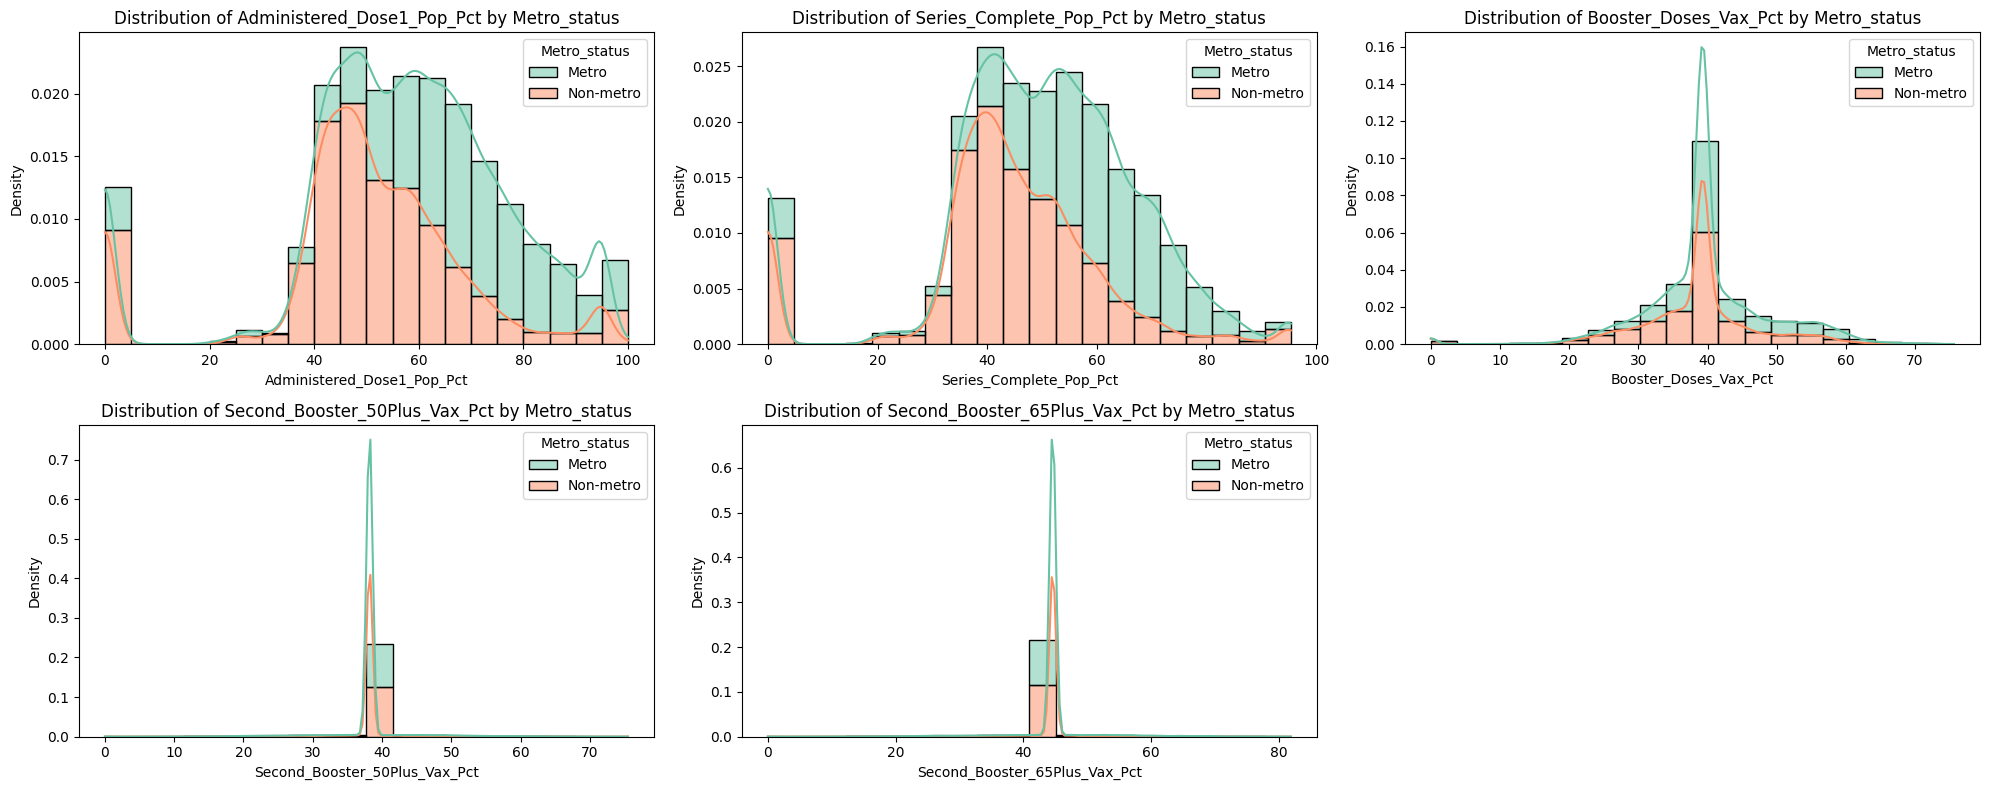

In [48]:
plt.figure(figsize=(20, 8))

# categorical column to use as hue
hue_col = 'Metro_status'

for i, col in enumerate(numeric_columns[:6], 1):  # Limit to 6 plots for layout
    plt.subplot(2, 3, i)
    sns.histplot(
        data=Covid19_Vaccine_Cleaned,
        x=col,
        hue=hue_col,
        kde=True,
        bins=20,
        multiple='stack',      # Options: 'layer', 'stack', or 'dodge'
        stat='density',
        palette='Set2'
    )
    plt.title(f"Distribution of {col} by {hue_col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


Geographic Insights:
___________________________________________________________________________
Top and bottom counties/states by vaccination rate.

Map visualizations using FIPS codes with choropleth maps (using Plotly or GeoPandas).

Urban vs Rural disparities via Metro_status.

In [49]:
top_counties = Covid19_Vaccine_Cleaned.groupby("Recip_County")["Series_Complete_Pop_Pct"].max().sort_values(ascending=False).head(10).reset_index()

top_counties

,Recip_County,Series_Complete_Pop_Pct
0,Santa Cruz County,95.4
1,Presidio County,95.0
2,Starr County,95.0
3,Apache County,95.0
4,Webb County,95.0
5,Maverick County,95.0
6,Irion County,95.0
7,Imperial County,95.0
8,Brooks County,95.0
9,New York County,93.4


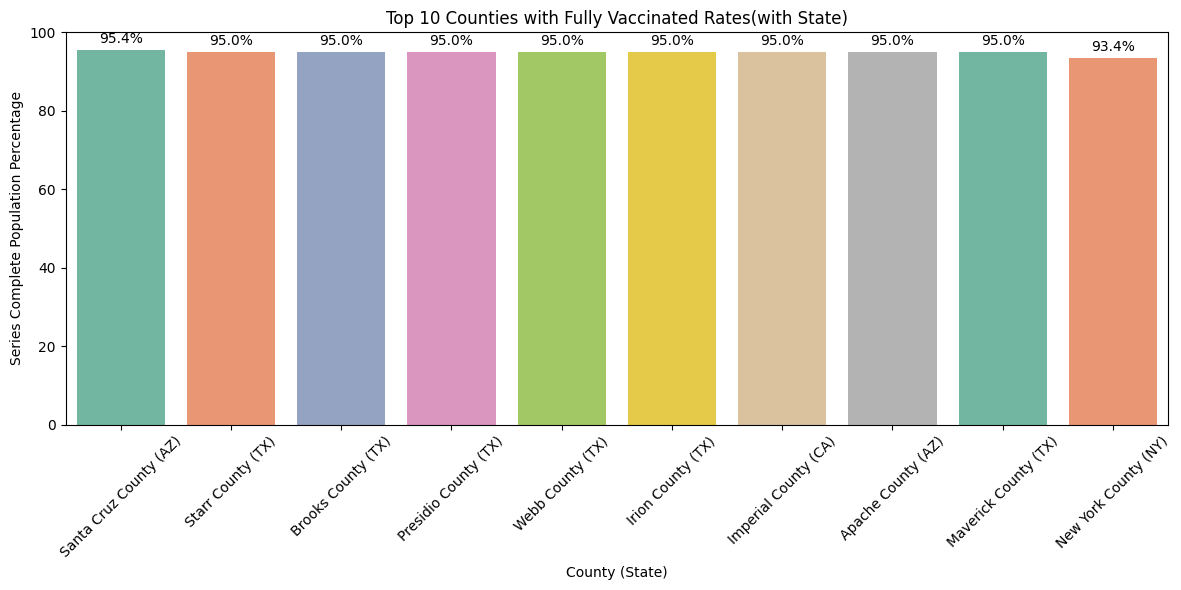

In [50]:
# Group by county + state and get the max value
grouped = Covid19_Vaccine_Cleaned.groupby(['Recip_County', 'Recip_State'])['Series_Complete_Pop_Pct'].max().reset_index()

# Sort and get top 10
top_10 = grouped.sort_values(by='Series_Complete_Pop_Pct', ascending=False).head(10)

# Combine county + state for labeling
top_10['County_State'] = top_10['Recip_County'] + " (" + top_10['Recip_State'] + ")"

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    data=top_10,
    x='County_State',
    y='Series_Complete_Pop_Pct',
    hue='County_State',
    palette='Set2',
    legend=False
)

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 1,
              f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Counties with Fully Vaccinated Rates(with State)")
plt.ylabel("Series Complete Population Percentage")
plt.xlabel("County (State)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

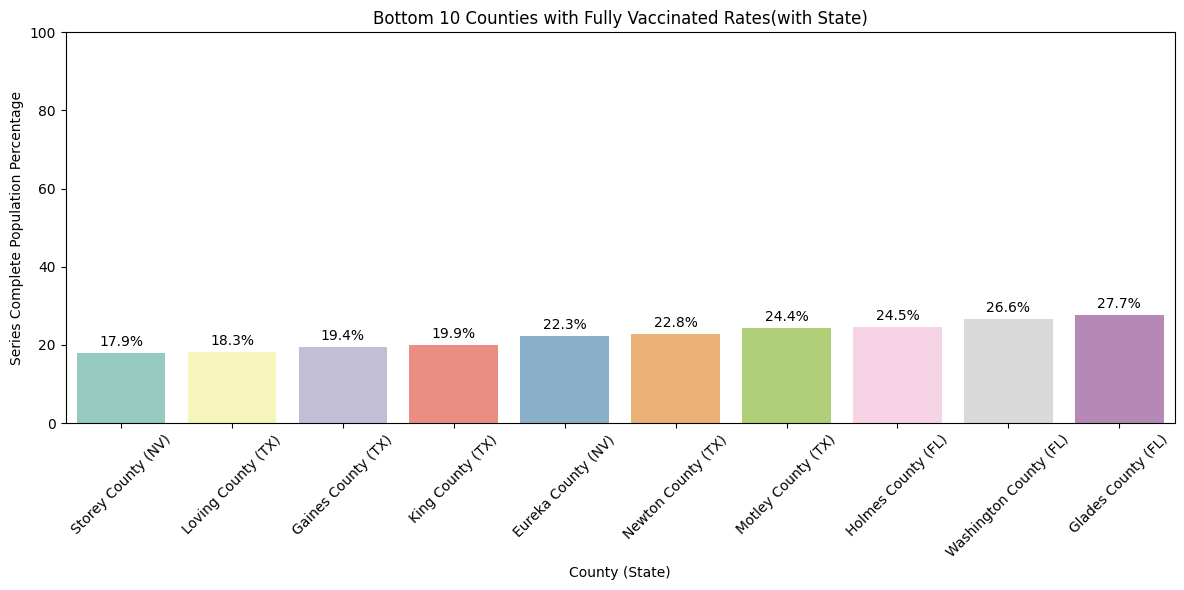

In [51]:
# Exclude entries with 0% vaccination
filtered_df = Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'] > 0]

# Group by county + state and get the min value
grouped = filtered_df.groupby(['Recip_County', 'Recip_State'])['Series_Complete_Pop_Pct'].min().reset_index()

# Sort and get bottom 10
bottom_10 = grouped.sort_values(by='Series_Complete_Pop_Pct', ascending=True).head(10)

# Combine county + state for labeling
bottom_10['County_State'] = bottom_10['Recip_County'] + " (" + bottom_10['Recip_State'] + ")"

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    data=bottom_10,
    x='County_State',
    y='Series_Complete_Pop_Pct',
    hue='County_State',
    palette='Set3',
    legend=False
)

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 1,
              f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title("Bottom 10 Counties with Fully Vaccinated Rates(with State)")
plt.ylabel("Series Complete Population Percentage")
plt.xlabel("County (State)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
zero_pct = Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'] == 0]
print(f"Number of records with 0% complete: {len(zero_pct)}")


Number of records with 0% complete: 10609


In [53]:
zero_pct[['Date', 'Recip_County', 'Recip_State', 'Metro_status']].head()

,Date,Recip_County,Recip_State,Metro_status
75435,3/15/2022,Inyo County,CA,Non-metro
75453,3/15/2022,Modoc County,CA,Non-metro
75496,3/15/2022,King County,TX,Non-metro
75535,3/15/2022,Plumas County,CA,Non-metro
75540,3/15/2022,Loving County,TX,Non-metro


In [54]:
zero_pct['Metro_status'].value_counts()

,count
Metro_status,
Non-metro,7735
Metro,2874


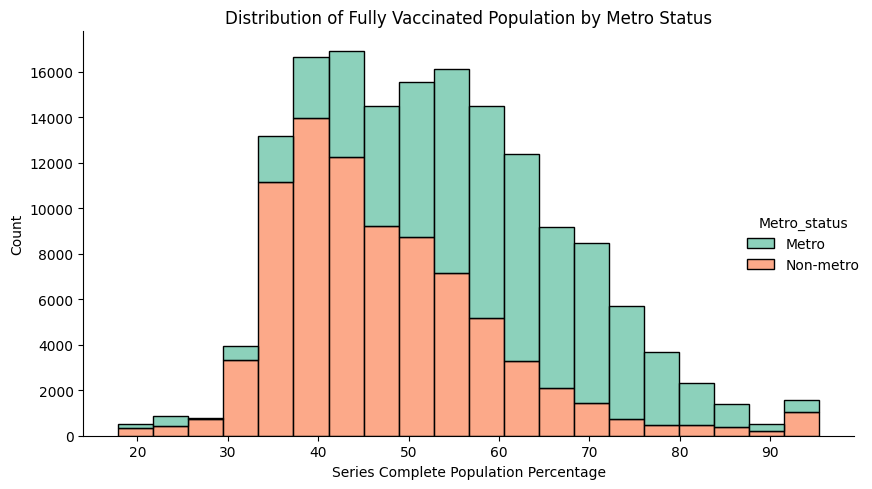

In [55]:
# Step 1: Remove "NAN" strings
Covid19_Vaccine_Cleaned = Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'] != 'NAN']

# Step 2: Convert column to numeric and remove zeros or missing
Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'] = pd.to_numeric(Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'], errors='coerce')
df_cleaned = Covid19_Vaccine_Cleaned[(Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'] > 0) & (Covid19_Vaccine_Cleaned['Series_Complete_Pop_Pct'].notna())]

# Step 3: Plot histogram with hue by Metro_status
sns.displot(
    data=df_cleaned,
    x="Series_Complete_Pop_Pct",
    hue="Metro_status",
    kind="hist",
    bins=20,
    multiple="stack",
    height=5,
    aspect=1.5,
    palette="Set2"
)

# Add labels and title
plt.title("Distribution of Fully Vaccinated Population by Metro Status")
plt.xlabel("Series Complete Population Percentage")
plt.tight_layout()
plt.show()

**Vaccination Rates by Age**

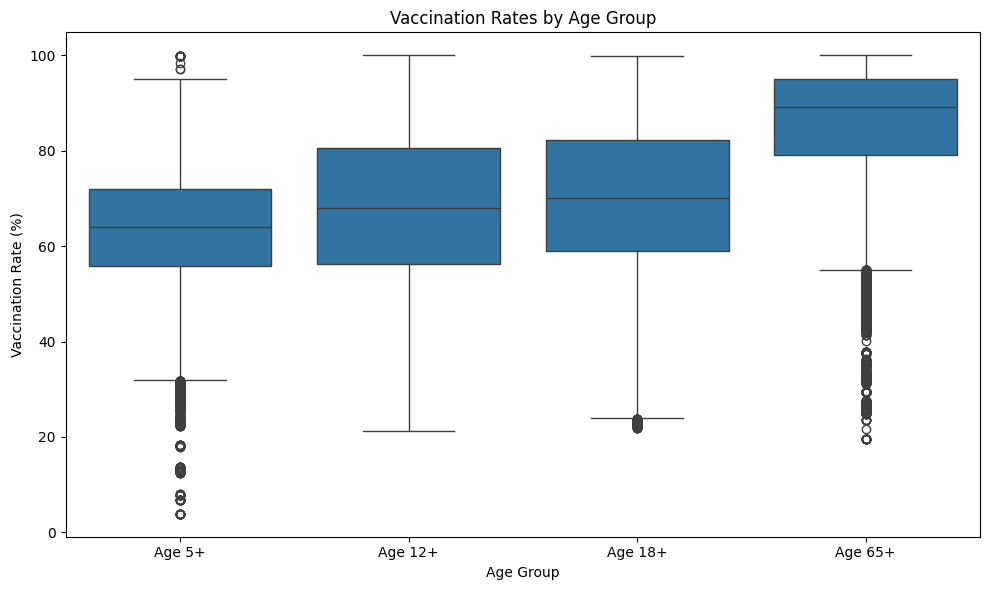

In [56]:
# Select relevant age group columns
age_group_cols = [
    'Administered_Dose1_Recip_5PlusPop_Pct',
    'Administered_Dose1_Recip_12PlusPop_Pct',
    'Administered_Dose1_Recip_18PlusPop_Pct',
    'Administered_Dose1_Recip_65PlusPop_Pct'
]

# Convert to numeric and melt into long format
Covid19_Vaccine_Cleaned[age_group_cols] = Covid19_Vaccine_Cleaned[age_group_cols].apply(pd.to_numeric, errors='coerce')
Covid19_age_melted = Covid19_Vaccine_Cleaned[age_group_cols].melt(var_name="Age_Group", value_name="Vaccination_Rate")

# Remove missing or zero entries
Covid19_age_melted = Covid19_age_melted[Covid19_age_melted['Vaccination_Rate'].notna() & (Covid19_age_melted['Vaccination_Rate'] > 0)]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Covid19_age_melted, x='Age_Group', y='Vaccination_Rate')
plt.title("Vaccination Rates by Age Group")
plt.ylabel("Vaccination Rate (%)")
plt.xlabel("Age Group")

# Customize x-axis tick labels
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Age 5+", "Age 12+", "Age 18+", "Age 65+"],
    rotation=0
)

plt.tight_layout()
plt.show()

<ipython-input-57-defbbf6fec18>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




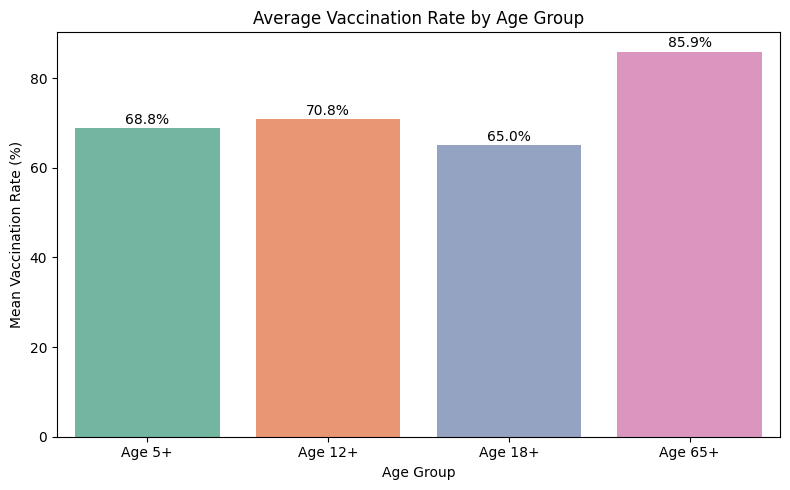

In [57]:
# Calculate mean vaccination rate per age group
mean_rates = Covid19_age_melted.groupby("Age_Group")["Vaccination_Rate"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_rates, x='Age_Group', y='Vaccination_Rate', palette='Set2')

# Add value labels on top of bars
for i, row in mean_rates.iterrows():
    plt.text(i, row['Vaccination_Rate'] + 1, f"{row['Vaccination_Rate']:.1f}%", ha='center')

plt.title("Average Vaccination Rate by Age Group")
plt.ylabel("Mean Vaccination Rate (%)")
plt.xlabel("Age Group")

# Customize x-axis tick labels (Method 1)
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Age 5+", "Age 12+", "Age 18+", "Age 65+"],
    rotation=0
)

plt.tight_layout()
plt.show()

**Time Series Trend of Vaccination by Age Group** : -     **Change**

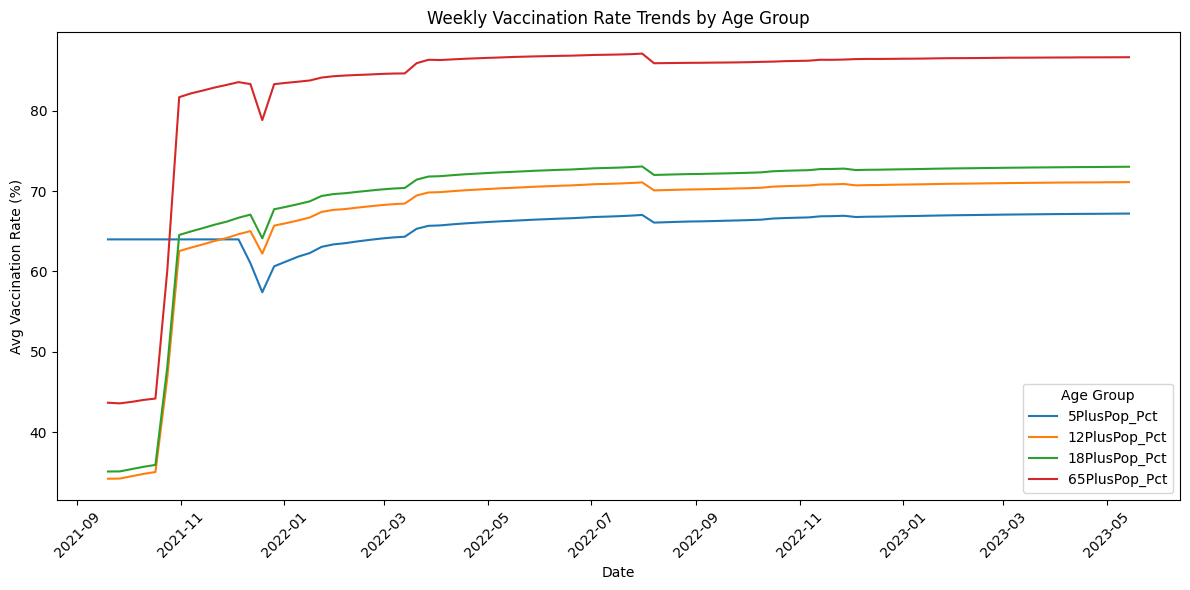

In [58]:
# Convert 'Date' column to datetime
Covid19_Vaccine_Cleaned['Date'] = pd.to_datetime(Covid19_Vaccine_Cleaned['Date'])

# Define age-specific columns
age_group_cols = [
    'Administered_Dose1_Recip_5PlusPop_Pct',
    'Administered_Dose1_Recip_12PlusPop_Pct',
    'Administered_Dose1_Recip_18PlusPop_Pct',
    'Administered_Dose1_Recip_65PlusPop_Pct'
]

# Ensure numeric
Covid19_Vaccine_Cleaned[age_group_cols] = Covid19_Vaccine_Cleaned[age_group_cols].apply(pd.to_numeric, errors='coerce')

# Compute weekly averages
weekly_avg = Covid19_Vaccine_Cleaned.groupby(pd.Grouper(key='Date', freq='W'))[age_group_cols].mean().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
for col in age_group_cols:
    sns.lineplot(data=weekly_avg, x='Date', y=col, label=col.replace('Administered_Dose1_Recip_', ''))

plt.title("Weekly Vaccination Rate Trends by Age Group")
plt.xlabel("Date")
plt.ylabel("Avg Vaccination Rate (%)")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**KDE Plot for Age Group Distributions**

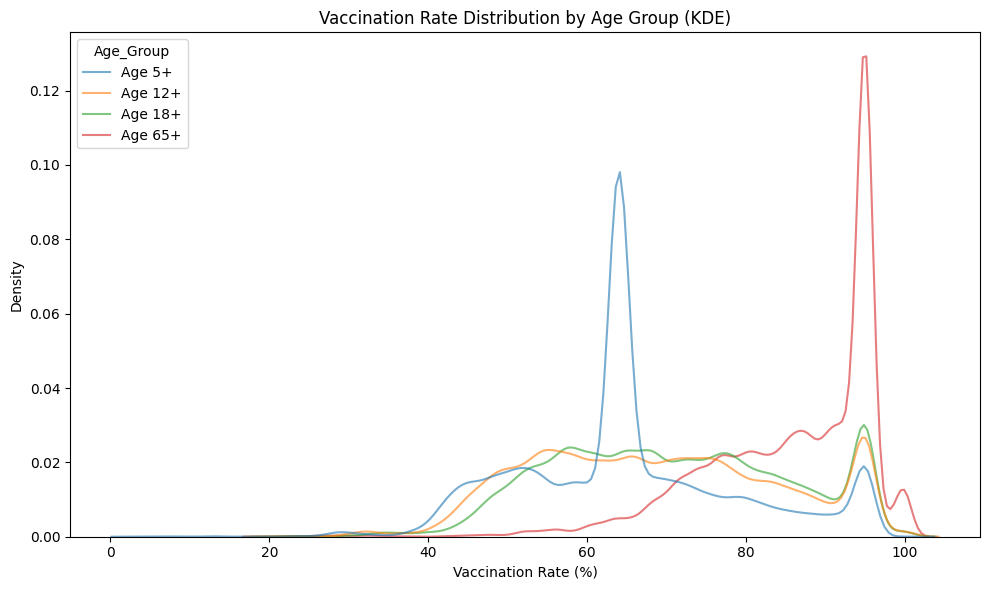

In [59]:
# Define label mapping
label_map = {
    'Administered_Dose1_Recip_5PlusPop_Pct': 'Age 5+',
    'Administered_Dose1_Recip_12PlusPop_Pct': 'Age 12+',
    'Administered_Dose1_Recip_18PlusPop_Pct': 'Age 18+',
    'Administered_Dose1_Recip_65PlusPop_Pct': 'Age 65+'
}

# Reshape data
Covid19_Vaccine_melted = Covid19_Vaccine_Cleaned[age_group_cols].melt(var_name="Age_Group", value_name="Vaccination_Rate")
Covid19_Vaccine_melted = Covid19_Vaccine_melted[Covid19_Vaccine_melted['Vaccination_Rate'].notna() & (Covid19_Vaccine_melted['Vaccination_Rate'] > 0)]

# Apply mapping to the melted dataframe
Covid19_Vaccine_melted['Age_Group'] = Covid19_Vaccine_melted['Age_Group'].map(label_map)

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=Covid19_Vaccine_melted,
    x="Vaccination_Rate",
    hue="Age_Group",
    fill=False,
    common_norm=False,
    alpha=0.6
)
plt.title("Vaccination Rate Distribution by Age Group (KDE)")
plt.xlabel("Vaccination Rate (%)")
plt.tight_layout()
plt.show()

Social Vulnerability & Equity
_________________________________________________________________________________________
Analyze coverage by SVI_CTGY (Social Vulnerability Index Category):

*   Are low-SVI counties more vaccinated than high-SVI?

Overlay equity metrics like:

*   65+ Fully Vaccinated (Urban-Rural Equity %)
*   Booster_Doses_12Plus_Vax_Pct_UR_Equity



**1. KDE Plot for 65+ Fully Vaccinated (Urban-Rural Equity %)**

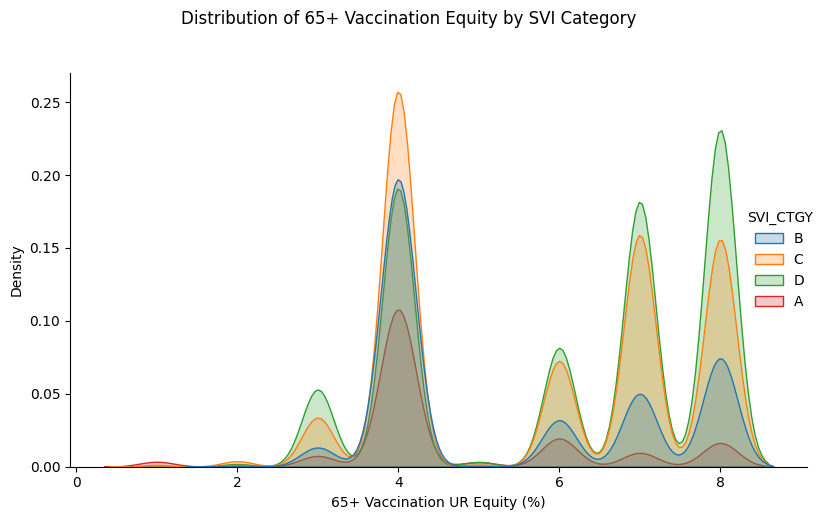

In [60]:
g = sns.displot(
    data=Covid19_Vaccine_Cleaned,
    x="Series_Complete_65PlusPop_Pct_UR_Equity",
    hue="SVI_CTGY",
    kind="kde",
    fill=True,
    height=5,
    aspect=1.5
)

# Customize x-axis label
g.set_axis_labels("65+ Vaccination UR Equity (%)", "Density")

# Optional: add a title
g.fig.suptitle("Distribution of 65+ Vaccination Equity by SVI Category", y=1.03)

plt.tight_layout()
plt.show()

**KDE Plot: Booster Dose (12+) Equity Distribution by SVI**

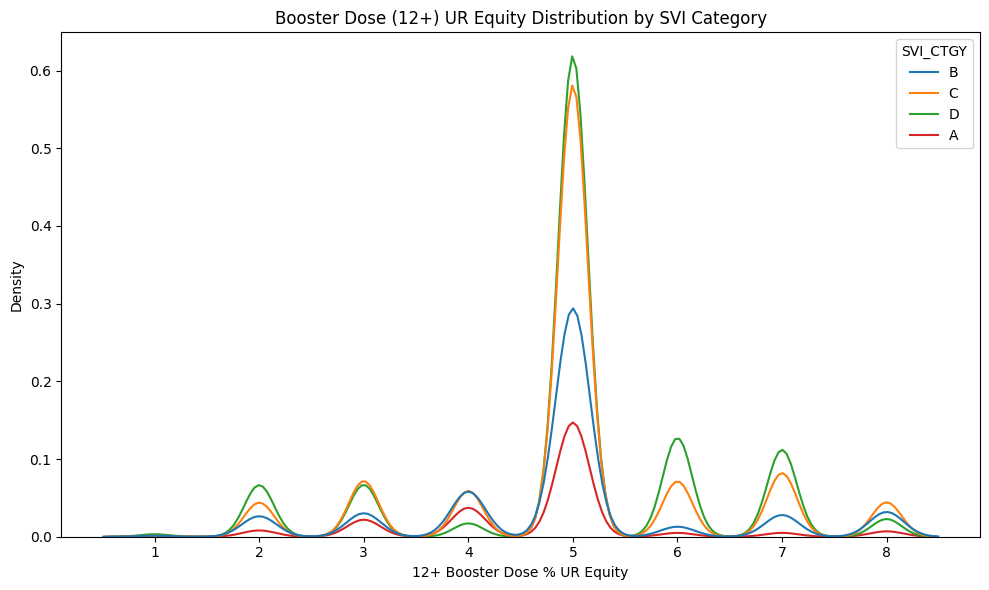

In [61]:
Covid19_Vaccine_Cleaned['Booster_Doses_12PlusVax_Pct_UR_Equity'] = pd.to_numeric(
    Covid19_Vaccine_Cleaned['Booster_Doses_12PlusVax_Pct_UR_Equity'], errors='coerce'
)

Covid19_Vaccine_Cleaned = Covid19_Vaccine_Cleaned[Covid19_Vaccine_Cleaned['Booster_Doses_12PlusVax_Pct_UR_Equity'].notna()]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=Covid19_Vaccine_Cleaned,
    x='Booster_Doses_12PlusVax_Pct_UR_Equity',
    hue='SVI_CTGY',
    fill=False,
)

plt.title("Booster Dose (12+) UR Equity Distribution by SVI Category")
plt.xlabel("12+ Booster Dose % UR Equity")
plt.tight_layout()
plt.show()